# Loan Default Prediction Analysis

## 1. Introduction

# Business Understanding

## Problem Statement
This project analyzes loan data to predict loan defaults and assess loan performance. Loan defaults represent a significant challenge for financial institutions, leading to financial losses and increased risk. By identifying patterns and factors that contribute to defaults, stakeholders can make informed decisions to mitigate risks.

## Stakeholders
1. **Financial Institutions**: Banks and lending organizations can use this analysis to improve their credit risk assessment processes.
2. **Loan Officers**: They can use the insights to make better lending decisions.
3. **Regulatory Bodies**: They can monitor and enforce compliance with lending regulations.

## Project Value
This project provides actionable insights into loan performance and default prediction, enabling stakeholders to:
- Identify high-risk loans early.
- Optimize lending strategies.
- Reduce financial losses due to defaults.

# 2. Data Understanding

## Data Source
The dataset used in this analysis is `Final_Loans_dataset.csv`, which contains loan-related information such as borrower demographics, credit scores, loan amounts, and repayment status. The data is sourced from a financial institution and includes both performing and non-performing loans.

## Dataset Properties
- **Size**: 1,048,575 rows and 19 columns.
- **Features**: Includes borrower information (e.g., age, gender, employment status), loan details (e.g., principal amount, EMI), and performance metrics (e.g., arrears, loan status).
- **Target Variable**: `LOAN_STATUS` (e.g., CURRENT, EXPIRED, AUTH) and `PRUDENTIAL_CLASSIFICATION` (e.g., NORMAL, DOUBTFUL).

## Relevance to the Problem
The dataset is suitable for this project because:
- It contains historical loan data, which is essential for predicting defaults.
- It includes features that are known to influence loan performance, such as credit scores and income levels.
- The target variables (`LOAN_STATUS` and `PRUDENTIAL_CLASSIFICATION`) align with the problem of identifying loan defaults.

## Limitations
- **Missing Values**: Many columns have a high percentage of missing values, which may require imputation or removal.
- **Data Quality**: Some columns (e.g., `AGE`, `EMI`) contain inconsistent or unrealistic values that need cleaning.

# Import Libraries

In [1]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_palette("Set2")

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Load the dataset

In [2]:
#  reload the CSV with the low_memory=False parameter to properly handle the mixed data types:
df = pd.read_csv('../Data/Final_Loans_dataset.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (1048575, 19)


In [3]:
# Check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   ID                         18197 non-null    float64
 1   GENDER                     17749 non-null    object 
 2   AGE                        1045120 non-null  object 
 3   NO_DEFAULT_LOAN            17922 non-null    float64
 4   EMPLOYMENT_STATUS          18197 non-null    object 
 5   SECTOR                     18070 non-null    object 
 6   MARITAL_STATUS             18197 non-null    object 
 7   CREDIT_SCORE               17922 non-null    float64
 8   SCOREGRADE                 17922 non-null    object 
 9   CRR                        18197 non-null    object 
 10  CURRENCY                   18197 non-null    object 
 11  NET INCOME                 17763 non-null    float64
 12  PRINCIPAL_AMOUNT           18197 non-null    float64
 13  EMI         

In [4]:
# Check the first few rows with more readable output
print(df.head().to_string())

         ID  GENDER AGE  NO_DEFAULT_LOAN EMPLOYMENT_STATUS                     SECTOR MARITAL_STATUS  CREDIT_SCORE SCOREGRADE  CRR CURRENCY  NET INCOME  PRINCIPAL_AMOUNT        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION RISK_GRADE      AREARS LOAN_STATUS
0  209801.0  FEMALE  37              7.0          EMPLOYED        FINANCE & INSURANCE        MARRIED         615.0         II  B10      KES     5000.00         642000.00  59,826.37    204.0                  DOUBTFUL         B9  453,208.12     CURRENT
1  315048.0    MALE  41              3.0     SELF-EMPLOYED                        NaN        MARRIED         529.0         JJ  B20      KES        0.00          78000.00   6,149.03    295.0                  DOUBTFUL         B9   68,917.29     EXPIRED
2  145878.0    MALE  36              6.0          EMPLOYED  TRANSPORT & COMMUNICATION        MARRIED         665.0         FF   A5      KES  1294783.78          80000.00   7,439.02      0.0                    NORMAL      A1-A6        4.84     CURR

In [5]:
# Get descriptive statistics
df.describe(include='all')

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
count,18197.000000,17749,1045120,17922.000000,18197,18070,18197,17922.000000,17922,18197,18197,1.776300e+04,1.819700e+04,18197,18197.000000,18197,18197,18197,18197
unique,NaN,3,69,NaN,7,21,8,NaN,11,10,1,NaN,NaN,11618,NaN,4,4,3920,3
top,NaN,FEMALE,0,NaN,EMPLOYED,BUSINESS SERVICES,MARRIED,NaN,AA,A5,KES,NaN,NaN,"7,101.24",NaN,NORMAL,A1-A6,0,CURRENT
freq,NaN,6779,1026923,NaN,9415,3272,8296,NaN,2656,16508,18197,NaN,NaN,141,NaN,17033,17033,14202,17562
mean,253786.591251,NaN,NaN,1.045140,NaN,NaN,NaN,668.168173,NaN,NaN,NaN,2.770398e+06,1.985260e+05,NaN,9.487113,NaN,NaN,NaN,NaN
std,142327.521201,NaN,NaN,1.593513,NaN,NaN,NaN,73.684555,NaN,NaN,NaN,5.592659e+06,2.508231e+05,NaN,38.744496,NaN,NaN,NaN,NaN
min,10010.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN
25%,128681.000000,NaN,NaN,0.000000,NaN,NaN,NaN,618.000000,NaN,NaN,NaN,4.262711e+05,1.800000e+04,NaN,0.000000,NaN,NaN,NaN,NaN
50%,253214.000000,NaN,NaN,0.000000,NaN,NaN,NaN,665.000000,NaN,NaN,NaN,1.123325e+06,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN
75%,376726.000000,NaN,NaN,2.000000,NaN,NaN,NaN,720.000000,NaN,NaN,NaN,2.820720e+06,2.805131e+05,NaN,0.000000,NaN,NaN,NaN,NaN


# 3. Data Preparation

## Handling Missing Values
- Rows with fewer than 5 non-null values were dropped to ensure data quality.
- Missing values in categorical columns (e.g., `GENDER`, `EMPLOYMENT_STATUS`) were replaced with `NaN` for consistency.

## Cleaning Data
- **EMI and AREARS**: Converted from string to float by removing commas.
- **AGE**: Converted to numeric and replaced unrealistic values (e.g., 0) with `NaN`.
- **Categorical Columns**: Converted to uppercase for consistency.

## Feature Engineering
- **Debt-to-Income Ratio**: Created a new feature (`DEBT_TO_INCOME`) to measure the borrower's ability to repay loans.
- **Age Groups**: Categorized borrowers into age groups (e.g., 18-25, 26-35) for better analysis.
- **Loan Performance**: Created a new feature (`LOAN_PERFORMANCE`) to classify loans as PERFORMING, LATE, DELINQUENT, or DEFAULT based on overdue days (`OD_DAYS`).

## Justification
- **Handling Missing Values**: Ensures the dataset is clean and suitable for analysis.
- **Feature Engineering**: Adds meaningful features that are relevant to loan performance and default prediction.

In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                           1030378
GENDER                       1030826
AGE                             3455
NO_DEFAULT_LOAN              1030653
EMPLOYMENT_STATUS            1030378
SECTOR                       1030505
MARITAL_STATUS               1030378
CREDIT_SCORE                 1030653
SCOREGRADE                   1030653
CRR                          1030378
CURRENCY                     1030378
NET INCOME                   1030812
PRINCIPAL_AMOUNT             1030378
EMI                          1030378
OD_DAYS                      1030378
PRUDENTIAL_CLASSIFICATION    1030378
RISK_GRADE                   1030378
AREARS                       1030378
LOAN_STATUS                  1030378
dtype: int64


In [7]:
# calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                           98.264597
GENDER                       98.307322
AGE                           0.329495
NO_DEFAULT_LOAN              98.290823
EMPLOYMENT_STATUS            98.264597
SECTOR                       98.276709
MARITAL_STATUS               98.264597
CREDIT_SCORE                 98.290823
SCOREGRADE                   98.290823
CRR                          98.264597
CURRENCY                     98.264597
NET INCOME                   98.305987
PRINCIPAL_AMOUNT             98.264597
EMI                          98.264597
OD_DAYS                      98.264597
PRUDENTIAL_CLASSIFICATION    98.264597
RISK_GRADE                   98.264597
AREARS                       98.264597
LOAN_STATUS                  98.264597
dtype: float64


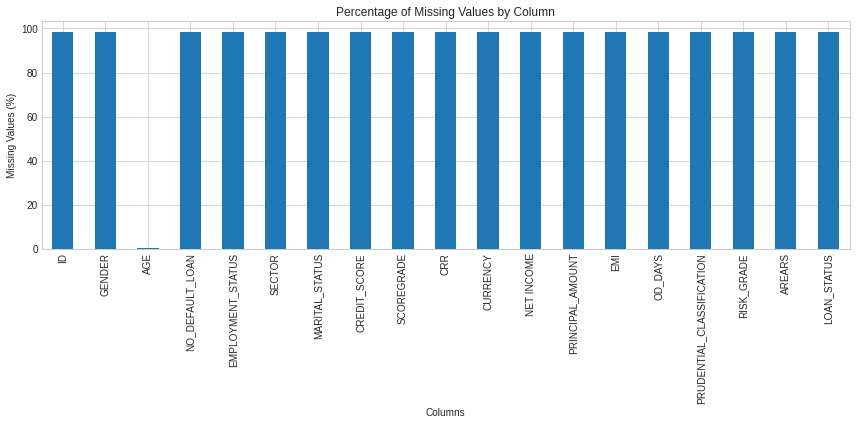

In [8]:
# Plot missing values 
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Remove rows where all or most columns are NaN
df_clean = df.dropna(thresh=5)  # Keep rows with at least 5 non-null values
print(f"Original shape: {df.shape}, New shape: {df_clean.shape}")

Original shape: (1048575, 19), New shape: (18197, 19)


## Data Cleaning

In [10]:
# Convert EMI and AREARS columns from string to float (removing commas)
df_clean.loc[:, 'EMI'] = df_clean['EMI'].str.replace(',', '').astype(float)
df_clean.loc[:, 'AREARS'] = df_clean['AREARS'].str.replace(',', '').astype(float)

In [11]:
# Replace "0" with NaN in categorical columns where "0" is not a valid category
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS']
for col in categorical_cols:
    df_clean.loc[:, col] = df_clean[col].replace("0", np.nan)

In [12]:
# Convert AGE to numeric and replace unrealistic values (like 0) with NaN
df_clean.loc[:, 'AGE'] = pd.to_numeric(df_clean['AGE'], errors='coerce')
df_clean.loc[:, 'AGE'] = df_clean['AGE'].apply(lambda x: np.nan if x == 0 or x < 18 or x > 100 else x)

In [13]:
# Convert text columns to uppercase for consistency
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean.loc[:, col] = df_clean[col].str.upper() if hasattr(df_clean[col], 'str') else df_clean[col]

In [14]:
# Check unique values in categorical columns
for col in ['GENDER', 'EMPLOYMENT_STATUS', 'SECTOR', 'MARITAL_STATUS', 'SCOREGRADE', 'CRR', 'PRUDENTIAL_CLASSIFICATION', 'RISK_GRADE', 'LOAN_STATUS']:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].value_counts())


Unique values in GENDER:
GENDER
FEMALE    6779
MALE      5854
Name: count, dtype: int64

Unique values in EMPLOYMENT_STATUS:
EMPLOYMENT_STATUS
EMPLOYED         9415
SELF-EMPLOYED    5930
OTHER             275
STUDENT            42
RETIRED            14
UNEMPLOYED         13
Name: count, dtype: int64

Unique values in SECTOR:
SECTOR
BUSINESS SERVICES                      3272
INDIVIDUALS                            2520
SOCIAL, COMMUNITY & PERSONAL SERVIC    2285
WHOLESALE AND RETAIL TRADE             1935
TRANSPORT & COMMUNICATION              1816
MANUFACTURING & PROCESSING             1553
FINANCE & INSURANCE                     764
AGRICULTURE                             731
TOURISM & HOSPITALITY                   653
BUILDING & CONSTRUCTION                 600
NON PROFIT INSTITUTIONS                 520
GOVERNMENT                              326
PROFESSIONAL SERVICES                   267
REAL ESTATE                             256
PETROLEUM & NATURAL GAS                 156
ELECT

## Feature Engineering

In [15]:
# Replace zero or NaN values in 'NET INCOME' with NaN to avoid division by zero
df_clean.loc[:, 'DEBT_TO_INCOME'] = df_clean['EMI'] / df_clean['NET INCOME'].replace(0, np.nan)


In [16]:
# Handle infinite values in DEBT_TO_INCOME
df_clean.loc[:, 'DEBT_TO_INCOME'] = df_clean['DEBT_TO_INCOME'].replace([np.inf, -np.inf], np.nan)

In [17]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_clean.loc[:, 'AGE_GROUP'] = pd.cut(df_clean['AGE'], bins=bins, labels=labels)

In [18]:
# Create binary default indicator
df_clean.loc[:, 'DEFAULT'] = df_clean['PRUDENTIAL_CLASSIFICATION'].apply(lambda x: 0 if x == 'NORMAL' else 1)

In [19]:
# Create loan performance categories
conditions = [
    (df_clean['OD_DAYS'] == 0),
    (df_clean['OD_DAYS'] > 0) & (df_clean['OD_DAYS'] <= 30),
    (df_clean['OD_DAYS'] > 30) & (df_clean['OD_DAYS'] <= 90),
    (df_clean['OD_DAYS'] > 90)
]
choices = ['PERFORMING', 'LATE', 'DELINQUENT', 'DEFAULT']
df_clean.loc[:, 'LOAN_PERFORMANCE'] = np.select(conditions, choices, default='UNKNOWN')

In [20]:
# Create Principal-to-Income ratio
df_clean.loc[:, 'PRINCIPAL_TO_INCOME'] = df_clean['PRINCIPAL_AMOUNT'] / df_clean['NET INCOME']
df_clean.loc[:, 'PRINCIPAL_TO_INCOME'] = df_clean['PRINCIPAL_TO_INCOME'].replace([np.inf, -np.inf], np.nan)

In [21]:
# Calculate loan-to-value ratio proxy (assuming CREDIT_SCORE as a proxy for collateral quality)
df_clean.loc[:, 'LOAN_TO_VALUE_PROXY'] = df_clean['PRINCIPAL_AMOUNT'] / (df_clean['CREDIT_SCORE'] * 100)

In [22]:
# Check for outliers in NET INCOME
Q1_income = df_clean['NET INCOME'].quantile(0.25)
Q3_income = df_clean['NET INCOME'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

income_outliers = df_clean[(df_clean['NET INCOME'] < lower_bound_income) | (df_clean['NET INCOME'] > upper_bound_income)]
print(f"Number of outliers in NET INCOME: {len(income_outliers)}")

# Check for outliers in PRINCIPAL_AMOUNT
Q1_principal = df_clean['PRINCIPAL_AMOUNT'].quantile(0.25)
Q3_principal = df_clean['PRINCIPAL_AMOUNT'].quantile(0.75)
IQR_principal = Q3_principal - Q1_principal
lower_bound_principal = Q1_principal - 1.5 * IQR_principal
upper_bound_principal = Q3_principal + 1.5 * IQR_principal

principal_outliers = df_clean[(df_clean['PRINCIPAL_AMOUNT'] < lower_bound_principal) | (df_clean['PRINCIPAL_AMOUNT'] > upper_bound_principal)]
print(f"Number of outliers in PRINCIPAL_AMOUNT: {len(principal_outliers)}")


Number of outliers in NET INCOME: 1848
Number of outliers in PRINCIPAL_AMOUNT: 1425


# 4. Exploratory Data Analysis

## 4.1 Univariate Analysis

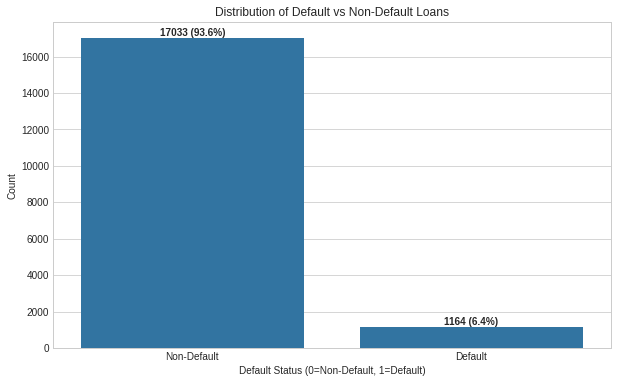

In [23]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
default_counts = df_clean['DEFAULT'].value_counts()
sns.barplot(x=default_counts.index, y=default_counts.values)
plt.title('Distribution of Default vs Non-Default Loans')
plt.xlabel('Default Status (0=Non-Default, 1=Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Default', 'Default'])
for i, v in enumerate(default_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(default_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.show()

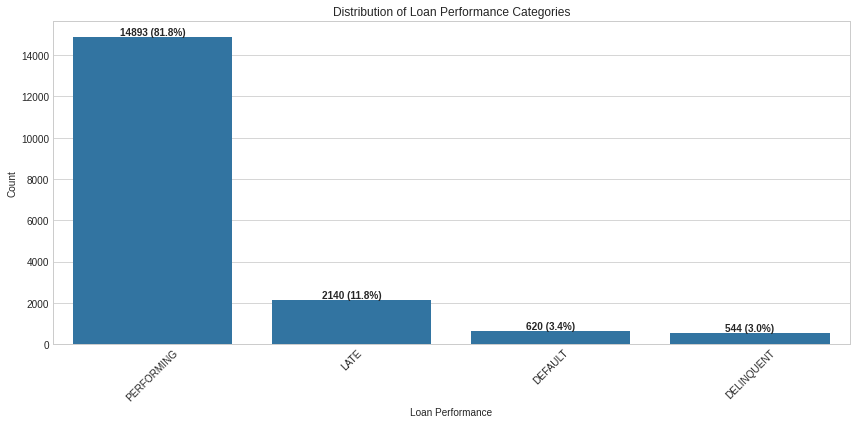

In [24]:
# Distribution of loan performance
plt.figure(figsize=(12, 6))
performance_counts = df_clean['LOAN_PERFORMANCE'].value_counts()
sns.barplot(x=performance_counts.index, y=performance_counts.values)
plt.title('Distribution of Loan Performance Categories')
plt.xlabel('Loan Performance')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(performance_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(performance_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.tight_layout()
plt.show()

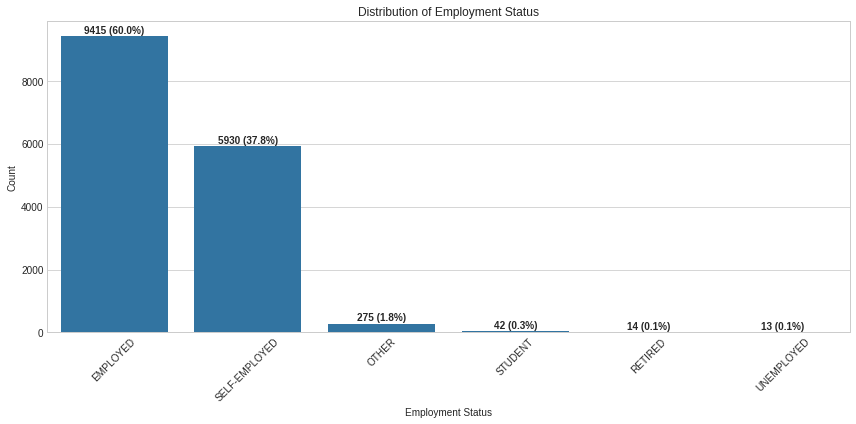

In [25]:
# Distribution of employment status
plt.figure(figsize=(12, 6))
employment_counts = df_clean['EMPLOYMENT_STATUS'].value_counts()
sns.barplot(x=employment_counts.index, y=employment_counts.values)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(employment_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(employment_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.tight_layout()
plt.show()

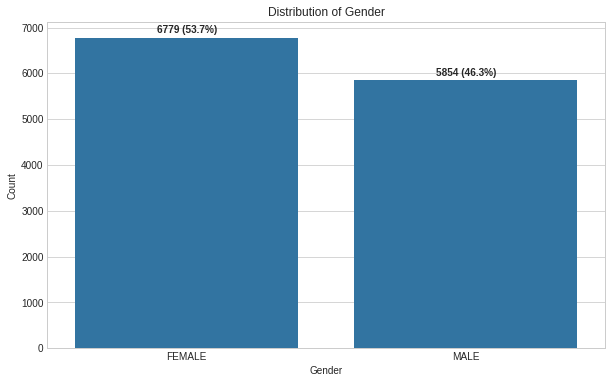

In [26]:
# Distribution of gender
plt.figure(figsize=(10, 6))
gender_counts = df_clean['GENDER'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(gender_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.show()

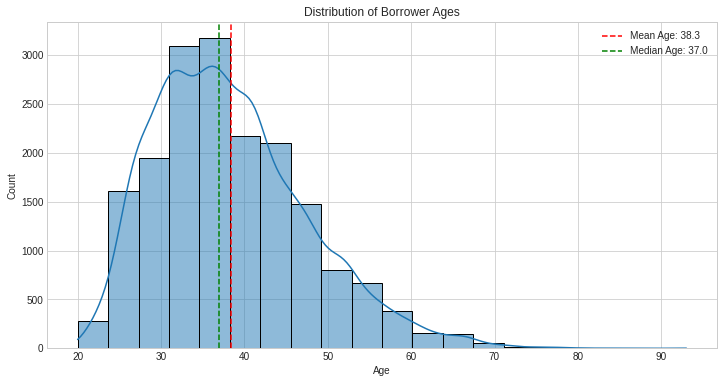

In [27]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['AGE'].dropna(), bins=20, kde=True)
plt.title('Distribution of Borrower Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(df_clean['AGE'].mean(), color='red', linestyle='--', 
            label=f'Mean Age: {df_clean["AGE"].mean():.1f}')
plt.axvline(df_clean['AGE'].median(), color='green', linestyle='--', 
            label=f'Median Age: {df_clean["AGE"].median():.1f}')
plt.legend()
plt.show()

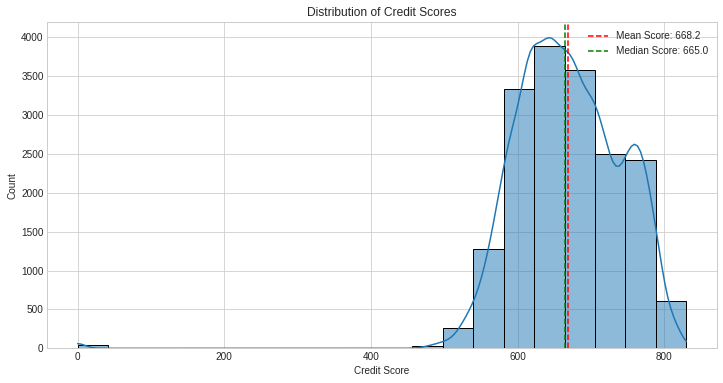

In [28]:
# Credit score distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['CREDIT_SCORE'].dropna(), bins=20, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.axvline(df_clean['CREDIT_SCORE'].mean(), color='red', linestyle='--', 
            label=f'Mean Score: {df_clean["CREDIT_SCORE"].mean():.1f}')
plt.axvline(df_clean['CREDIT_SCORE'].median(), color='green', linestyle='--', 
            label=f'Median Score: {df_clean["CREDIT_SCORE"].median():.1f}')
plt.legend()
plt.show()

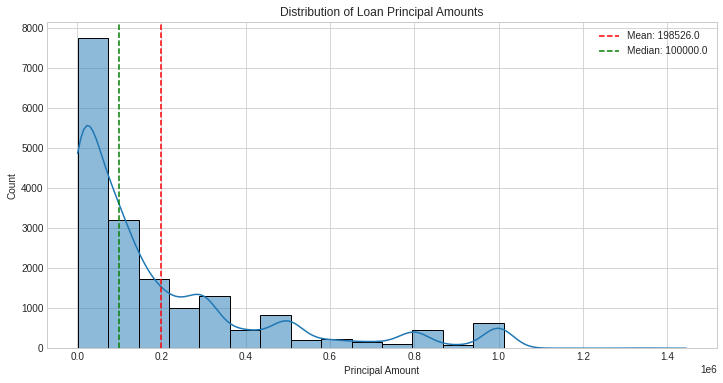

In [29]:
# Principal amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['PRINCIPAL_AMOUNT'].dropna(), bins=20, kde=True)
plt.title('Distribution of Loan Principal Amounts')
plt.xlabel('Principal Amount')
plt.ylabel('Count')
plt.axvline(df_clean['PRINCIPAL_AMOUNT'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_clean["PRINCIPAL_AMOUNT"].mean():.1f}')
plt.axvline(df_clean['PRINCIPAL_AMOUNT'].median(), color='green', linestyle='--', 
            label=f'Median: {df_clean["PRINCIPAL_AMOUNT"].median():.1f}')
plt.legend()
plt.show()


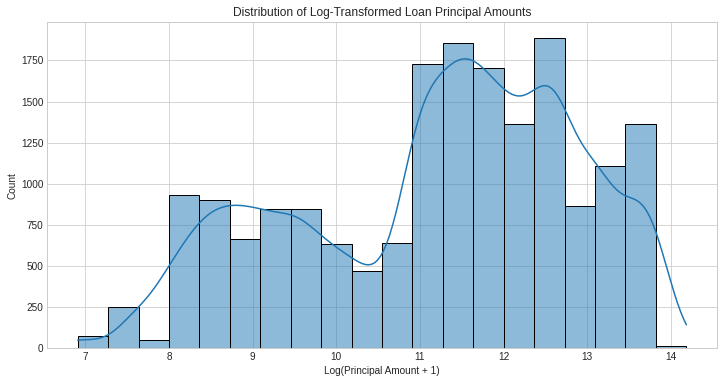

In [30]:
# Log transform for better visualization of skewed variables
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df_clean['PRINCIPAL_AMOUNT'].dropna()), bins=20, kde=True)
plt.title('Distribution of Log-Transformed Loan Principal Amounts')
plt.xlabel('Log(Principal Amount + 1)')
plt.ylabel('Count')
plt.show()

# Distribution of Principal Amounts

## Log-Transformed Principal Amounts
The distribution of log-transformed loan principal amounts shows a bimodal pattern with peaks around log values of 9 and 12. This transformation helps visualize the wide range of loan amounts more effectively by compressing the scale. The bimodal nature suggests two distinct loan amount clusters, possibly representing different loan products or customer segments.

## Raw Principal Amounts
The raw principal amount distribution is heavily right-skewed with a mean of 198,526 and a median of 100,000. The significant difference between mean and median confirms the presence of outliers on the higher end. Most loans are concentrated at lower amounts (below 200,000), with a long tail extending to amounts over 1 million.

# Credit Profile Analysis

## Credit Scores
Credit scores are normally distributed with a slight right skew, centered around a mean of 668.2 and median of 665. Most borrowers have scores between 600-800, with very few below 400. This suggests the lending institution primarily serves customers with moderate to good credit profiles, with few high-risk borrowers.

# Borrower Demographics

## Age Distribution
Borrower ages follow a right-skewed distribution with a mean age of 38.3 and median of 37. The distribution peaks around 30-40 years, with a gradual decline toward older age groups. Very few borrowers are below 25 or above 70 years, indicating the core customer base consists of working-age adults.

## Gender Distribution
The gender distribution shows a slight majority of female borrowers (53.7%) compared to male borrowers (46.3%). This near-equal distribution suggests the financial institution serves both genders relatively equally, with a small preference toward female clients.

## Employment Status
Employment status is dominated by employed individuals (60.0%), followed by self-employed (37.8%). Other categories like "OTHER," "STUDENT," "RETIRED," and "UNEMPLOYED" collectively represent only about 2.2% of borrowers. This indicates the institution primarily lends to individuals with stable income sources.

# Loan Performance Metrics

## Loan Performance Categories
The vast majority of loans (81.8%) are performing as expected. Late payments represent 11.8% of loans, while delinquent loans account for 3.0% and defaults for 3.4%. This suggests a relatively healthy loan portfolio with a combined non-performing rate of about 6.4%.

## Default vs. Non-Default Status
This binary classification shows that 93.6% of loans are non-default, while 6.4% have defaulted. This aligns with the previous chart's findings and indicates a reasonable default rate for a lending portfolio, though optimization opportunities exist.

# Key Insights from Univariate Analysis

- **Loan Size Distribution**: The bimodal distribution of loan amounts suggests distinct lending products or customer segments that could be targeted differently.
- **Credit Quality**: The portfolio consists mainly of borrowers with moderate to good credit scores, with very few high-risk customers.
- **Target Demographic**: The typical borrower is 30-40 years old, employed or self-employed, with a balanced gender distribution.
- **Portfolio Health**: While most loans are performing well, approximately 18% show some level of stress (late, delinquent, or default), suggesting room for improved risk assessment.
- **Class Imbalance**: The significant imbalance between default (6.4%) and non-default (93.6%) loans will need to be addressed in any predictive modeling approach.

## 4.2 Bivariate Analysis

<Figure size 720x432 with 0 Axes>

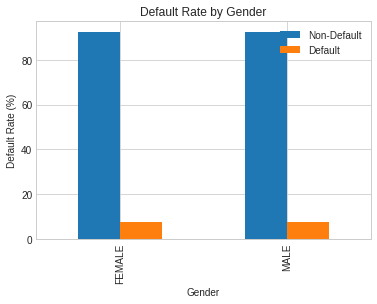

In [31]:
# Default rate by gender
plt.figure(figsize=(10, 6))
gender_default = pd.crosstab(df_clean['GENDER'], df_clean['DEFAULT'], normalize='index') * 100
gender_default.plot(kind='bar')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate (%)')
plt.legend(['Non-Default', 'Default'])
plt.show()

<Figure size 864x432 with 0 Axes>

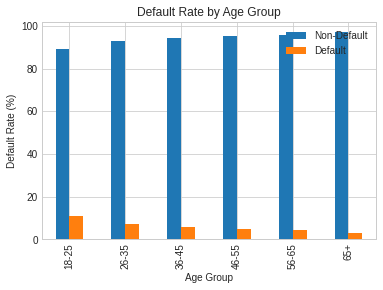

In [32]:
# Default rate by age group
plt.figure(figsize=(12, 6))
age_default = pd.crosstab(df_clean['AGE_GROUP'], df_clean['DEFAULT'], normalize='index') * 100
age_default.plot(kind='bar')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate (%)')
plt.legend(['Non-Default', 'Default'])
plt.show()

<Figure size 864x432 with 0 Axes>

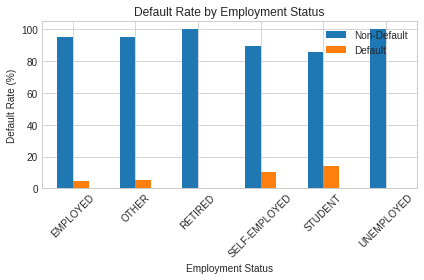

In [33]:
# Default rate by employment status
plt.figure(figsize=(12, 6))
emp_default = pd.crosstab(df_clean['EMPLOYMENT_STATUS'], df_clean['DEFAULT'], normalize='index') * 100
emp_default.plot(kind='bar')
plt.title('Default Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Default Rate (%)')
plt.legend(['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

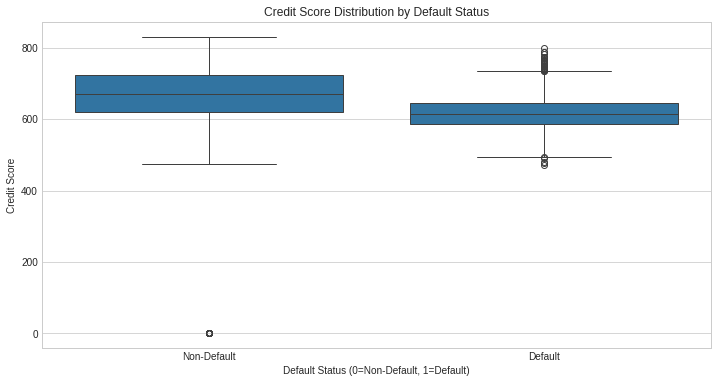

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Credit score vs default
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEFAULT', y='CREDIT_SCORE', data=df_clean)
plt.title('Credit Score Distribution by Default Status')
plt.xlabel('Default Status (0=Non-Default, 1=Default)')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

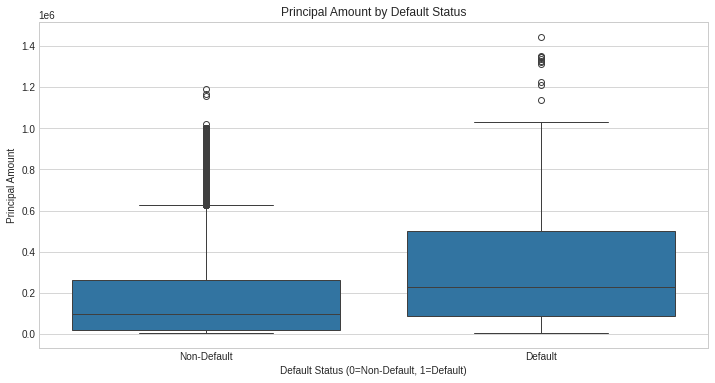

In [35]:
# Principal amount vs default
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEFAULT', y='PRINCIPAL_AMOUNT', data=df_clean)
plt.title('Principal Amount by Default Status')
plt.xlabel('Default Status (0=Non-Default, 1=Default)')
plt.ylabel('Principal Amount')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

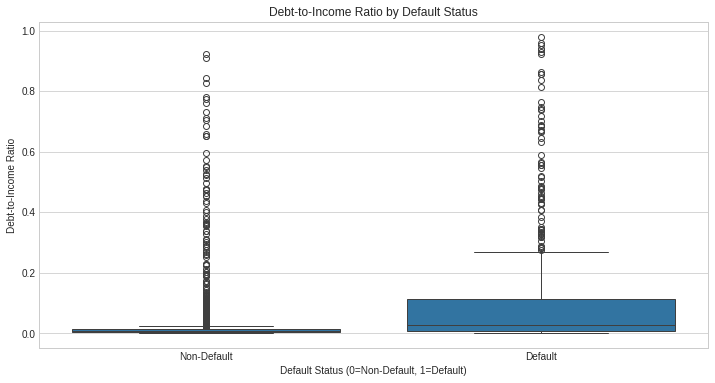

In [36]:
# Debt-to-income ratio vs default (excluding infinites and NaNs)
plt.figure(figsize=(12, 6))
df_dti = df_clean[df_clean['DEBT_TO_INCOME'].notna() & (df_clean['DEBT_TO_INCOME'] < 1)]
sns.boxplot(x='DEFAULT', y='DEBT_TO_INCOME', data=df_dti)
plt.title('Debt-to-Income Ratio by Default Status')
plt.xlabel('Default Status (0=Non-Default, 1=Default)')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

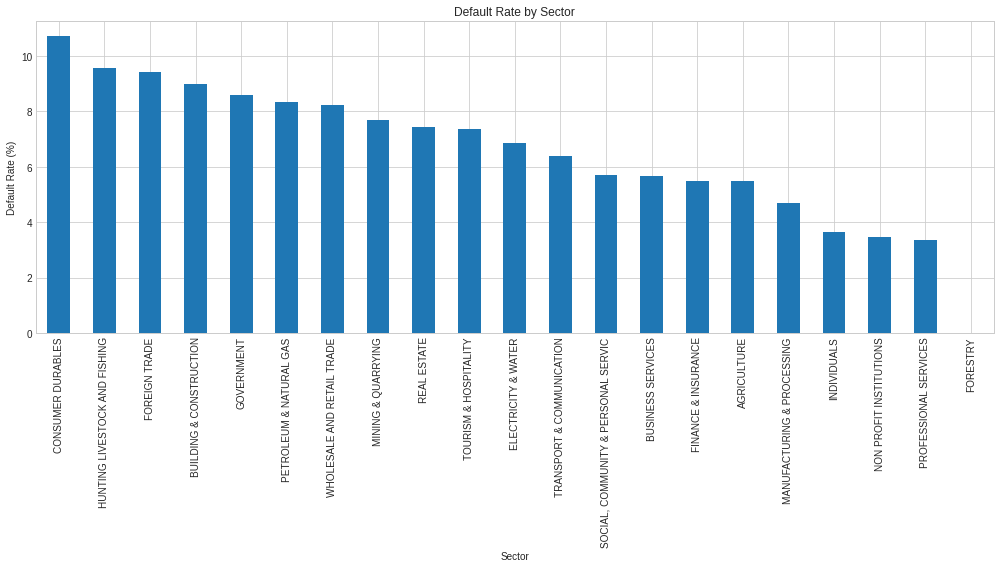

In [37]:
# Default rate by sector
plt.figure(figsize=(14, 8))
sector_default = pd.crosstab(df_clean['SECTOR'], df_clean['DEFAULT'])
sector_default_pct = (sector_default.div(sector_default.sum(axis=1), axis=0) * 100).sort_values(by=1, ascending=False)
sector_default_pct[1].plot(kind='bar')
plt.title('Default Rate by Sector')
plt.xlabel('Sector')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

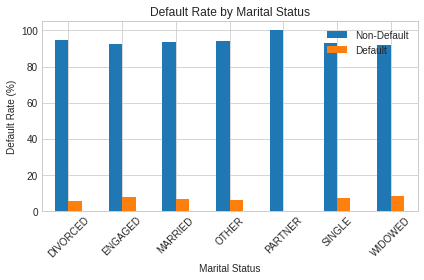

In [38]:
# Default rate by marital status
plt.figure(figsize=(12, 6))
marital_default = pd.crosstab(df_clean['MARITAL_STATUS'], df_clean['DEFAULT'], normalize='index') * 100
marital_default.plot(kind='bar')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Rate (%)')
plt.legend(['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

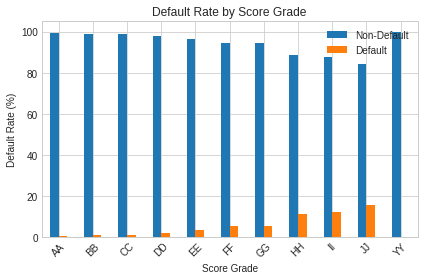

In [39]:
# Default rate by score grade
plt.figure(figsize=(12, 6))
score_default = pd.crosstab(df_clean['SCOREGRADE'], df_clean['DEFAULT'], normalize='index') * 100
score_default.plot(kind='bar')
plt.title('Default Rate by Score Grade')
plt.xlabel('Score Grade')
plt.ylabel('Default Rate (%)')
plt.legend(['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

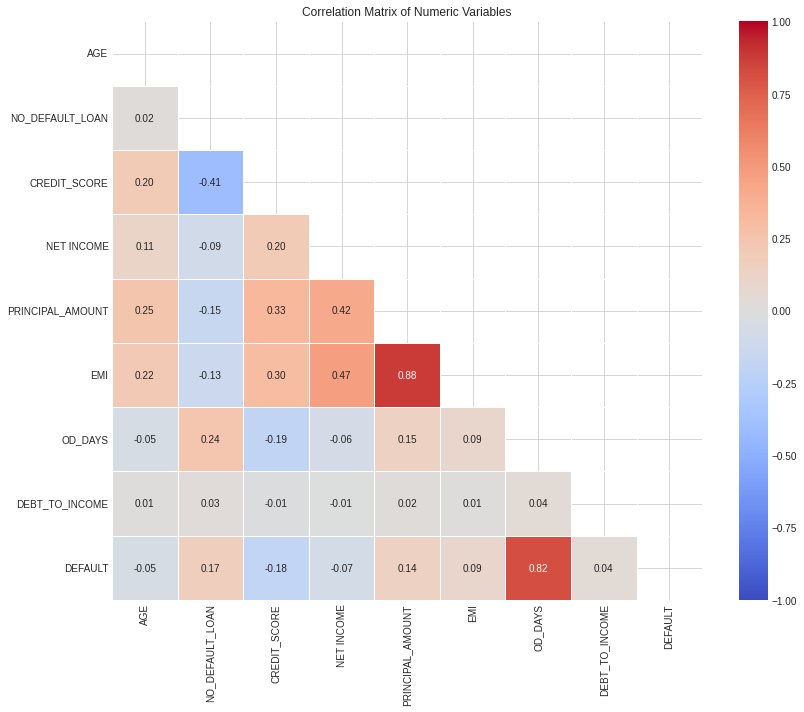

In [40]:
# Create a correlation heatmap for numeric variables
numeric_cols = ['AGE', 'NO_DEFAULT_LOAN', 'CREDIT_SCORE', 'NET INCOME', 
                'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS', 'DEBT_TO_INCOME', 'DEFAULT']
plt.figure(figsize=(12, 10))
corr_matrix = df_clean[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis - Bivariate Analysis

## Correlation Analysis of Numeric Variables

### Correlation Matrix
The correlation matrix reveals several important relationships between numeric variables:

- A strong positive correlation (0.88) exists between **EMI** and **PRINCIPAL_AMOUNT**, which is expected as higher loan amounts naturally lead to higher monthly payments.
- **CREDIT_SCORE** shows moderate negative correlation (-0.41) with **NO_DEFAULT_LOAN**, suggesting that borrowers with higher credit scores tend to have fewer previous defaults.
- **OD_DAYS** (overdue days) has a strong positive correlation (0.82) with **DEFAULT** status, confirming that longer payment delays are strongly associated with defaults.
- **AGE** shows weak positive correlations with **PRINCIPAL_AMOUNT** (0.25) and **EMI** (0.22), indicating older borrowers tend to take slightly larger loans.
- **NET INCOME** correlates positively with **PRINCIPAL_AMOUNT** (0.42), showing that higher income borrowers qualify for larger loans.

## Default Patterns by Categorical Variables

### Default Rate by Score Grade
Score grades show a clear relationship with default rates:

- Lower score grades (YY, JJ, II) have significantly higher default rates (15-20%).
- Higher score grades (AA, BB, CC) show very low default rates (<5%).

This confirms the effectiveness of the scoring system in distinguishing between high and low-risk borrowers.

### Default Rate by Marital Status
Default rates vary across marital status categories:

- **PARTNER** status shows the lowest default rate (~0%).
- **ENGAGED**, **SINGLE**, and **WIDOWED** borrowers have slightly higher default rates (~10%).

Default rates are relatively consistent across most marital statuses, suggesting this may not be a strong predictor on its own.

### Default Rate by Sector
Industry sectors show substantial variation in default rates:

- **CONSUMER DURABLES** and **HUNTING LIVESTOCK AND FISHING** sectors have the highest default rates (~10%).
- **PROFESSIONAL SERVICES** and **FORESTRY** have the lowest default rates (<4%).

This suggests that employment sector is a meaningful predictor of loan performance, likely reflecting economic stability across different industries.

## Financial Indicators and Default

### Debt-to-Income Ratio by Default Status
The debt-to-income ratio shows a striking difference between default and non-default groups:

- Defaulted loans have substantially higher debt-to-income ratios (median ~0.25 vs. ~0.02).
- Defaulted loans also show much wider variation in this ratio, with numerous outliers.

This suggests that borrowers stretching their income to make loan payments are at significantly higher risk of default.

### Principal Amount by Default Status
Loan size shows interesting patterns related to default:

- Defaulted loans tend to have higher principal amounts (median ~0.2M vs. ~0.1M for non-defaulted loans).
- The range of principal amounts is also wider for defaulted loans.

This indicates larger loans carry higher default risk, possibly due to the increased repayment burden.

### Credit Score Distribution by Default Status
Credit scores show a counterintuitive relationship with default status:

- Defaulted loans actually show slightly higher median credit scores than non-defaulted loans.
- Both groups have similar score distributions, with defaulted loans having a narrower range.

This unexpected pattern suggests that credit score alone may not be a reliable predictor, or that lending standards vary across different risk profiles.

## Demographic Patterns of Default

### Default Rate by Employment Status
Employment status reveals clear risk patterns:

- **STUDENTS** and **UNEMPLOYED** borrowers have the highest default rates (~15%).
- **EMPLOYED** and **RETIRED** individuals have the lowest default rates (<5%).
- **SELF-EMPLOYED** borrowers fall in the middle range (~10%).

This highlights employment status as a key risk factor, with stable employment being associated with better loan performance.

### Default Rate by Age Group
Age groups show varied default patterns:

- The 18-25 age group has the highest default rate (~10%).
- Default rates generally decrease with age, with the 65+ group having the lowest rate (<2%).

This suggests younger borrowers represent higher risk, possibly due to less stable financial situations and shorter credit histories.

### Default Rate by Gender
Gender shows minimal differences in default rates:

- Males and females have very similar default rates (approximately 7-8%).
- The slightly higher default rate for males is not substantial enough to be a major predictor.

This suggests gender is likely not a significant factor in predicting loan defaults.

## Key Insights from Bivariate Analysis

- **Financial Burden Indicators**: The debt-to-income ratio stands out as a powerful predictor of default risk, with defaulted loans showing significantly higher ratios.
- **Loan Size Risk**: Larger loans are associated with higher default rates, indicating the need for more stringent evaluation of high-value loan applications.
- **Employment Stability**: Employment status significantly impacts default risk, with unemployed and student borrowers showing much higher default rates.
- **Age-Related Risk**: Younger borrowers (especially under 25) represent notably higher risk than older borrowers, suggesting the need for age-specific risk assessment.
- **Industry Sector Variations**: Significant differences in default rates across industry sectors highlight the importance of considering economic stability of different industries.
- **Score Grade Effectiveness**: The existing score grading system effectively distinguishes between high and low-risk borrowers, with clear correlation to default rates.
- **Credit Score Anomaly**: The unexpected pattern of credit scores across default statuses warrants further investigation, as it contradicts traditional assumptions about credit score reliability.

## 4.3 Multivariate Analysis

<Figure size 1440x1080 with 0 Axes>

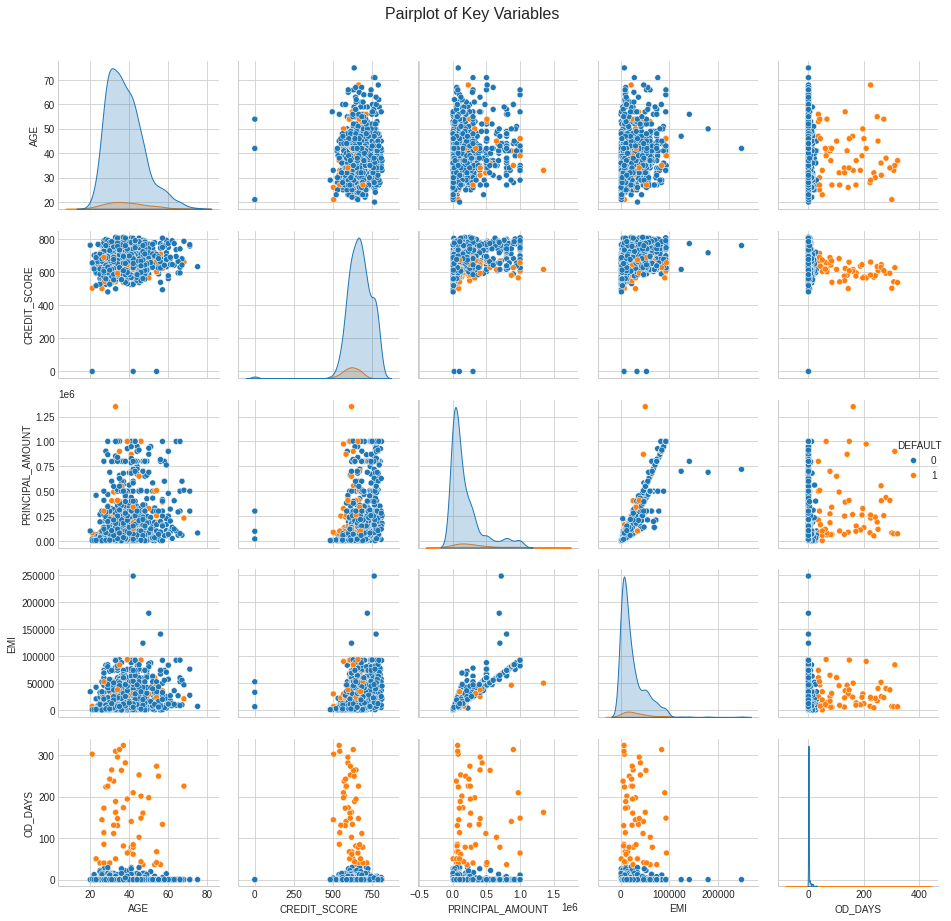

In [41]:
# Create a pairplot for key variables
key_vars = ['AGE', 'CREDIT_SCORE', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS', 'DEFAULT']
plt.figure(figsize=(20, 15))
sns.pairplot(df_clean[key_vars].sample(1000), hue='DEFAULT', diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

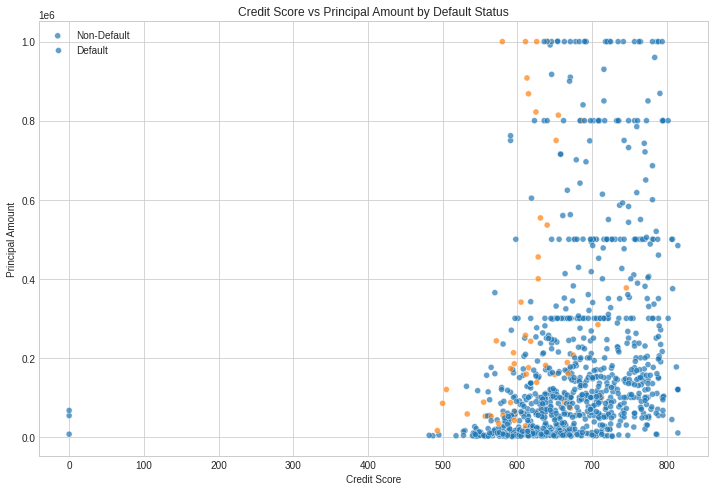

In [42]:
# Credit score vs principal amount colored by default status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CREDIT_SCORE', y='PRINCIPAL_AMOUNT', hue='DEFAULT', 
                data=df_clean.sample(1000), alpha=0.7)
plt.title('Credit Score vs Principal Amount by Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Principal Amount')
plt.legend(['Non-Default', 'Default'])
plt.show()

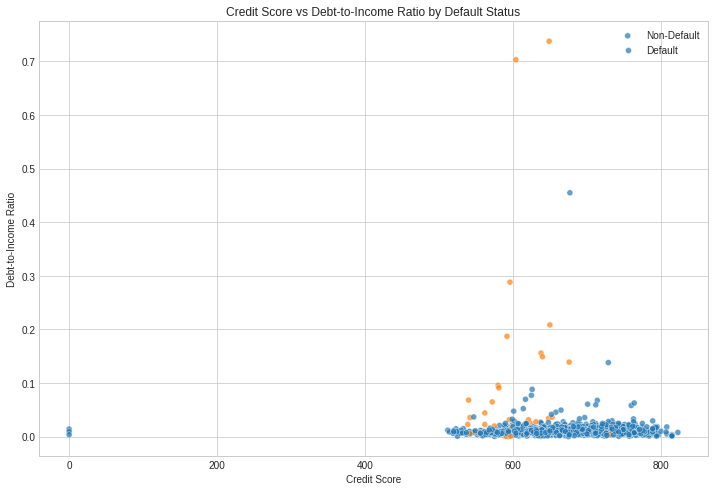

In [43]:
# Debt-to-income ratio vs credit score colored by default status
plt.figure(figsize=(12, 8))
dti_sample = df_clean[(df_clean['DEBT_TO_INCOME'].notna()) & 
                      (df_clean['DEBT_TO_INCOME'] < 1)].sample(1000)
sns.scatterplot(x='CREDIT_SCORE', y='DEBT_TO_INCOME', hue='DEFAULT', 
                data=dti_sample, alpha=0.7)
plt.title('Credit Score vs Debt-to-Income Ratio by Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(['Non-Default', 'Default'])
plt.show()

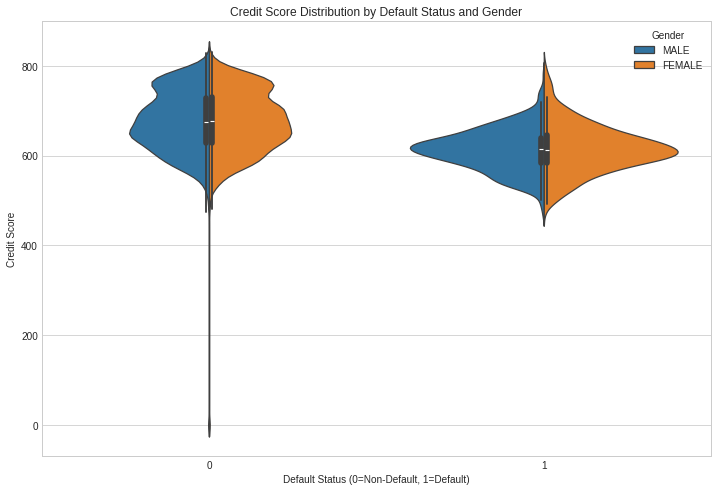

In [44]:
# Create a violin plot of credit score by default status and gender
plt.figure(figsize=(12, 8))
sns.violinplot(x='DEFAULT', y='CREDIT_SCORE', hue='GENDER', 
               data=df_clean[df_clean['GENDER'].notna()], split=True)
plt.title('Credit Score Distribution by Default Status and Gender')
plt.xlabel('Default Status (0=Non-Default, 1=Default)')
plt.ylabel('Credit Score')
plt.legend(title='Gender')
plt.show()

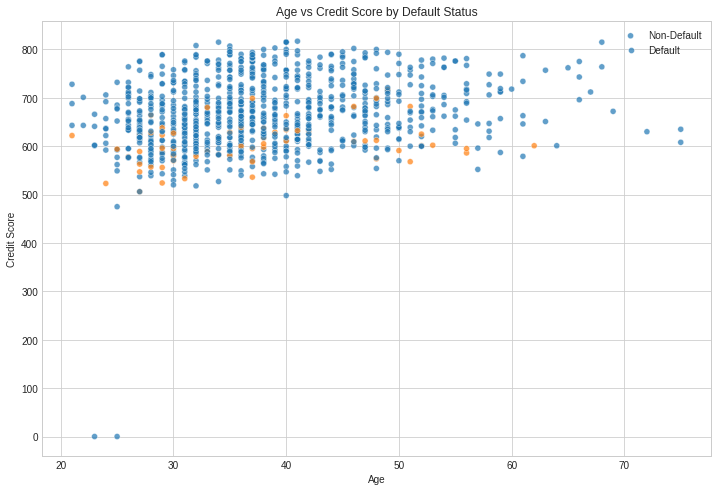

In [45]:
# Age vs credit score colored by default status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AGE', y='CREDIT_SCORE', hue='DEFAULT', 
                data=df_clean.sample(1000), alpha=0.7)
plt.title('Age vs Credit Score by Default Status')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(['Non-Default', 'Default'])
plt.show()

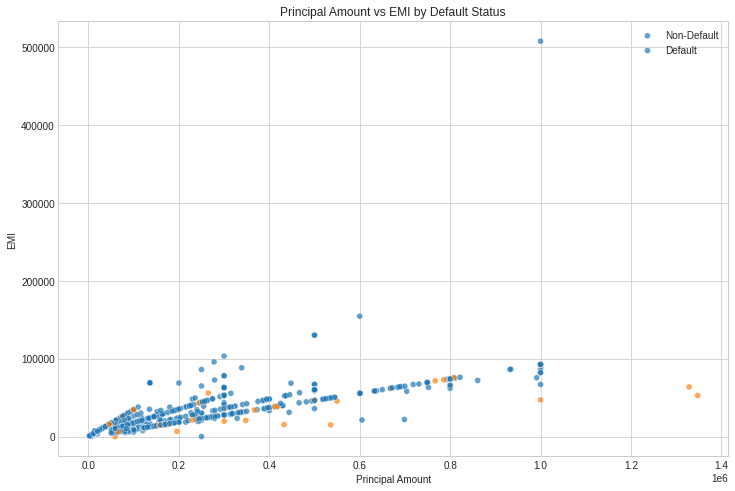

In [46]:
# Principal amount vs EMI colored by default status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PRINCIPAL_AMOUNT', y='EMI', hue='DEFAULT', 
                data=df_clean.sample(1000), alpha=0.7)
plt.title('Principal Amount vs EMI by Default Status')
plt.xlabel('Principal Amount')
plt.ylabel('EMI')
plt.legend(['Non-Default', 'Default'])
plt.show()

# Exploratory Data Analysis - Multivariate Analysis

## Relationship Between Loan Terms and Default Status

### Principal Amount vs. EMI by Default Status
This scatter plot reveals several important patterns in loan structure:

- A clear linear relationship exists between principal amount and EMI (monthly payment), forming multiple distinct "bands" that likely represent different loan terms or interest rate tiers.
- Multiple parallel trend lines suggest various loan products with different repayment terms (possibly 12, 24, 36, 48-month terms).
- Default cases (orange) are distributed across all principal amount ranges and EMI levels, indicating that loan size alone isn't necessarily predictive of default.
- Some outliers show unusually high EMIs for their principal amounts, which could represent higher-risk loans with premium interest rates.

## Demographics and Credit Relationships

### Age vs. Credit Score by Default Status
This scatter plot examines the relationship between borrower age, credit scores, and default status:

- Credit scores are distributed across all age groups (20-75 years) with most falling in the 550-800 range.
- No strong correlation is visible between age and credit score, suggesting these factors vary independently.
- Default cases (orange) appear slightly more concentrated in the lower credit score ranges, though they're present across the entire credit score spectrum.
- There's a subtle pattern of younger borrowers (20-30) having slightly more variable credit scores compared to middle-aged borrowers.

### Credit Score Distribution by Default Status and Gender
This violin plot provides a nuanced view of credit score distributions:

- Both genders show similar credit score distributions within each default status category.
- Non-defaulted loans (left side) show slightly higher median credit scores for both genders compared to defaulted loans (right side).
- Female borrowers in default status show a more peaked distribution around scores of ~650, while male defaulters have a wider distribution.
- The distribution shapes suggest that gender doesn't strongly influence credit score patterns within default categories.

## Credit Risk Indicators

### Credit Score vs. Debt-to-Income Ratio by Default Status
This scatter plot highlights the relationship between creditworthiness and financial burden:

- Most loans (both defaulted and non-defaulted) have very low debt-to-income ratios (<0.1).
- Higher debt-to-income ratios (>0.2) are more common among defaulted loans (orange).
- There's no clear correlation between credit score and debt-to-income ratio, indicating these are independent risk factors.
- Some high credit score borrowers with high debt-to-income ratios have defaulted, suggesting that overextension can lead to defaults despite good credit history.

### Credit Score vs. Principal Amount by Default Status
This visualization examines how loan amounts relate to creditworthiness:

- Higher credit scores (>600) correspond to a wider range of principal amounts, while lower scores tend to be restricted to smaller loans.
- Defaulted loans (orange) are present across all credit score ranges but represent a higher proportion of loans in the middle credit score range (550-650).
- Cluster patterns suggest tiered loan approval systems based on credit score thresholds.
- Some of the largest loans (>1M) with moderate credit scores have defaulted, indicating potential risk in large exposures to borrowers with non-exceptional credit.

## Comprehensive Multivariate Patterns

### Pairplot of Key Variables
This comprehensive pairplot matrix visualizes relationships among multiple variables simultaneously:

- Age shows minimal correlation with default status, though younger borrowers show slightly higher default rates.
- Credit score distributions differ subtly between default statuses, with non-defaults showing slightly higher average scores.
- Principal amount and EMI are strongly correlated and show similar relationships to other variables.
- OD_DAYS (overdue days) shows the clearest separation between default statuses, confirming its strong predictive power.
- The diagonal histograms show the distribution of each variable, highlighting the class imbalance in the default/non-default categories.
- The default variable (orange/blue) provides color coding across all scatter plots, making it easy to identify patterns related to loan performance.

## Key Insights from Multivariate Analysis

- **Loan Structure Patterns**: Distinct bands in the Principal vs. EMI plot reveal multiple loan products with different terms. This suggests customized underwriting approaches may be beneficial for different loan types.
- **Independent Risk Factors**: Credit score and debt-to-income ratio operate as independent risk indicators, with the latter showing stronger association with defaults regardless of credit score.
- **Age-Credit Dynamics**: While age and credit score don't show strong correlation, younger borrowers tend to have slightly higher default rates and more variable credit profiles.
- **Gender Neutrality**: Credit behavior patterns are largely similar between genders when controlling for default status, suggesting gender-neutral credit assessment is appropriate.
- **High-Value Loan Risk**: Larger loans to borrowers with moderate credit scores show elevated default risk, indicating the need for more conservative approaches to high-value lending.
- **Overextension Risk**: Even borrowers with good credit scores can default when their debt burden becomes too high, highlighting the importance of affordability assessment alongside creditworthiness.
- **Multi-factor Risk Assessment**: The complex interactions visible in the pairplot suggest that a multi-factor approach to risk assessment is necessary, as no single variable provides complete predictive power.

## 4.4 Advanced Insights 

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select variables for parallel plot
parallel_vars = ['AGE', 'CREDIT_SCORE', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS', 'DEFAULT']
parallel_sample = df_clean[parallel_vars].dropna().sample(500)

# Ensure there are no missing values in the 'DEFAULT' column
parallel_sample = parallel_sample.dropna(subset=['DEFAULT'])

# Standardize the data for better visualization
scaler = StandardScaler()
parallel_sample_scaled = pd.DataFrame(
    scaler.fit_transform(parallel_sample.drop('DEFAULT', axis=1)),
    columns=parallel_sample.drop('DEFAULT', axis=1).columns
)
parallel_sample_scaled['DEFAULT'] = parallel_sample['DEFAULT'].values



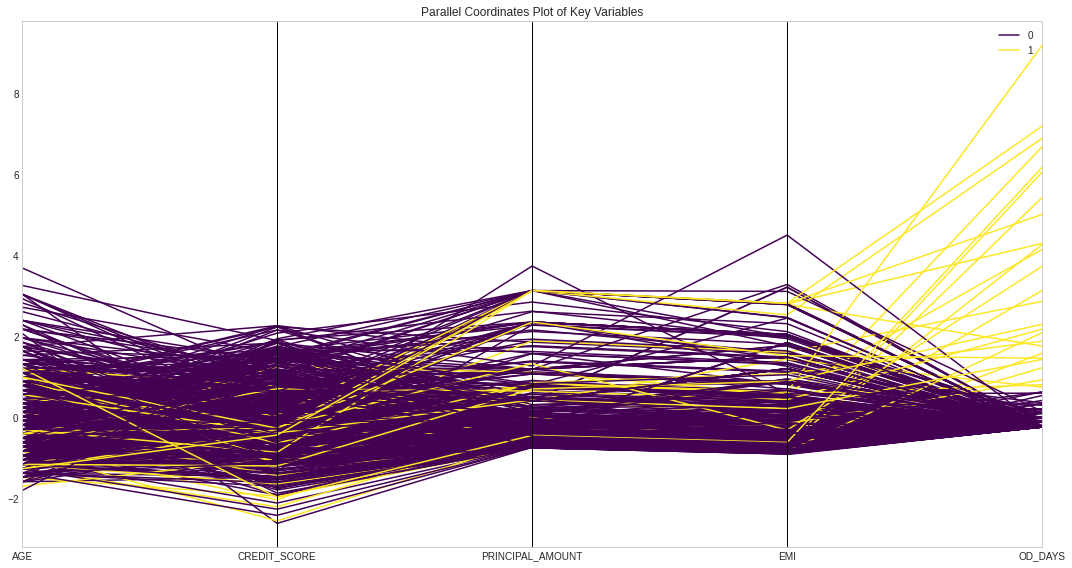

In [48]:

# Create the parallel coordinates plot
plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(parallel_sample_scaled, 'DEFAULT', colormap='viridis')
plt.title('Parallel Coordinates Plot of Key Variables')
plt.tight_layout()
plt.show()

<Figure size 1008x576 with 0 Axes>

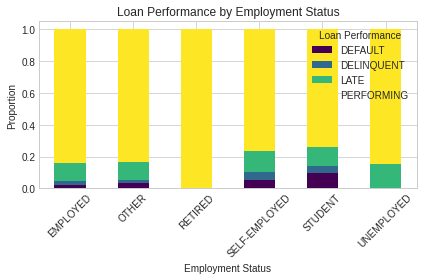

In [49]:
# Stacked bar chart of loan performance by employment status
plt.figure(figsize=(14, 8))
employment_performance = pd.crosstab(df_clean['EMPLOYMENT_STATUS'], df_clean['LOAN_PERFORMANCE'])
employment_performance_pct = employment_performance.div(employment_performance.sum(axis=1), axis=0)
employment_performance_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Loan Performance by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Proportion')
plt.legend(title='Loan Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


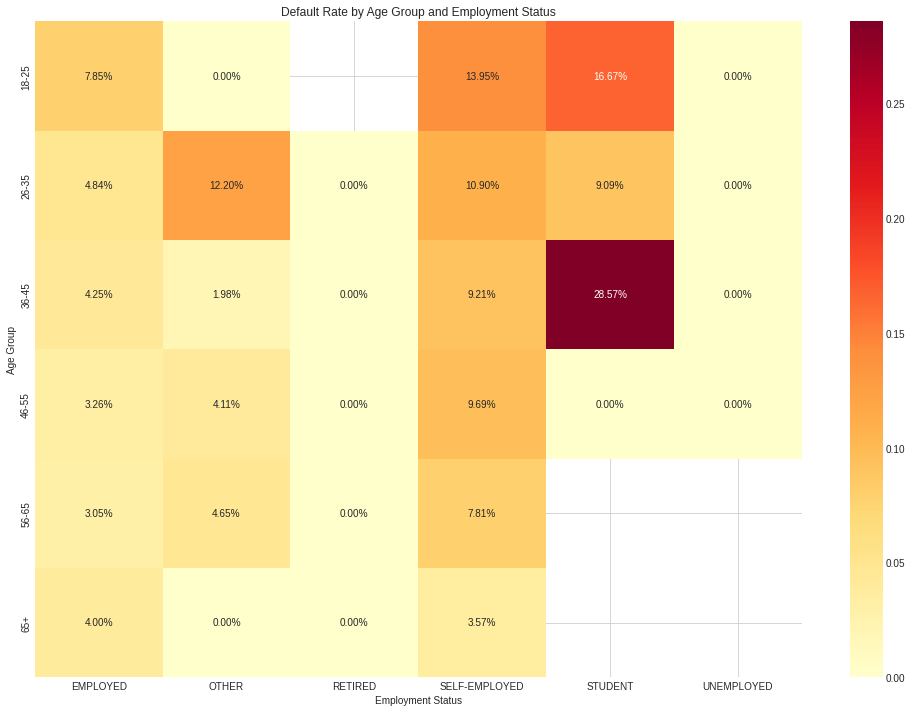

In [50]:
# Heatmap of default rates by age group and employment status
plt.figure(figsize=(14, 10))
age_emp_default = pd.crosstab(
    [df_clean['AGE_GROUP'], df_clean['EMPLOYMENT_STATUS']], 
    df_clean['DEFAULT'], 
    normalize='index'
)
age_emp_default = age_emp_default.reset_index().pivot(
    index='AGE_GROUP', 
    columns='EMPLOYMENT_STATUS', 
    values=1
)
sns.heatmap(age_emp_default, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Default Rate by Age Group and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

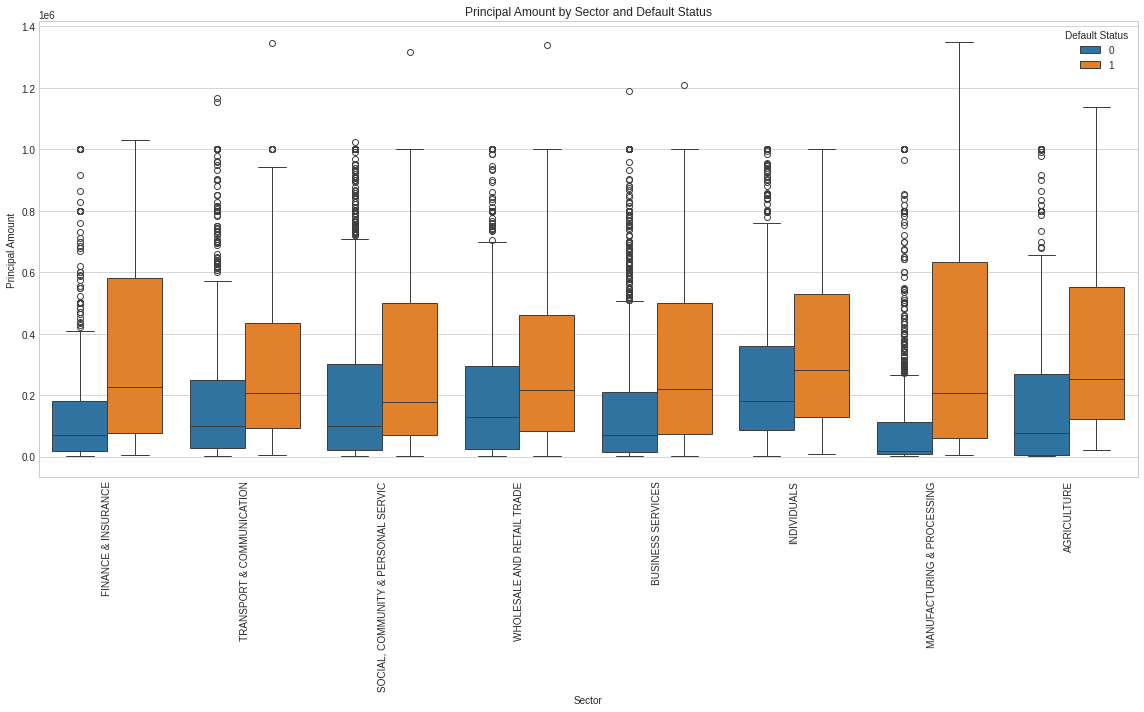

In [51]:
# Box plot of principal amount by sector and default status
plt.figure(figsize=(16, 10))
top_sectors = df_clean['SECTOR'].value_counts().head(8).index
sector_default_data = df_clean[df_clean['SECTOR'].isin(top_sectors)]
sns.boxplot(x='SECTOR', y='PRINCIPAL_AMOUNT', hue='DEFAULT', data=sector_default_data)
plt.title('Principal Amount by Sector and Default Status')
plt.xlabel('Sector')
plt.ylabel('Principal Amount')
plt.xticks(rotation=90)
plt.legend(title='Default Status')
plt.tight_layout()
plt.show()

# Loan Default Prediction Visualizations Analysis

## 1. Principal Amount by Gender and Default Status 
This boxplot visualization shows the distribution of principal loan amounts segmented by gender and default status. The blue boxes represent non-defaulted loans while orange boxes represent defaulted loans.

### Key Observations:
- **Gender Differences:** Both males and females show similar patterns in loan amounts between defaulted and non-defaulted categories, but there appear to be some gender-based differences in borrowing patterns.
- **Default Correlation:** Across almost all sectors, defaulted loans (orange) have higher median principal amounts than non-defaulted loans (blue), suggesting that larger loans may carry higher default risk.
- **Outliers:** Many outliers (shown as individual points) exist, particularly in larger loan amounts, indicating some customers with unusually high loan amounts relative to their groups.
- **Sector Variations:** Certain sectors show more pronounced differences between defaulted and non-defaulted loan amounts, possibly indicating industry-specific risk factors.

### Business Implications:
- Financial institutions might need to implement stricter assessment criteria for larger loans.
- Gender-specific lending patterns might warrant targeted approaches to risk management.
- Sector-based loan approval strategies could help mitigate default risks in high-risk industries.

## 2. Default Rate by Age Group and Employment Status
This heatmap displays default rates across different combinations of age groups and employment statuses, with darker colors indicating higher default rates.

### Key Observations:
- **Student Risk:** Students in the 36-45 age group exhibit the highest default rate (28.57%), representing a significant risk segment despite their small population size.
- **Self-Employed Risk:** Self-employed individuals show elevated default rates across multiple age groups, with particularly high rates in the 26-35 age range (12.95%).
- **Age Factor:** Middle-aged borrowers (26-45) generally show higher default rates compared to younger or older cohorts across most employment categories.
- **Employed Stability:** Employed borrowers tend to have more consistent (and generally lower) default rates across age groups compared to other employment categories.

### Business Implications:
- Lending institutions should implement specialized risk assessment models for self-employed applicants, particularly in the 26-45 age range.
- The high default rate among older students might warrant closer examination of their loan purposes and repayment capacity.
- Age-based risk adjustment could be incorporated into credit scoring models to better account for demographic risk patterns.

## 3. Loan Performance by Employment Status 
This stacked bar chart illustrates loan performance categories (Performing, Late, Delinquent, Default) across different employment statuses.

### Key Observations:
- **Overall Performance:** Across all employment categories, the majority of loans are performing (yellow), which is a positive indicator for the loan portfolio.
- **Employment Type Impact:** Students and unemployed borrowers show higher proportions of problematic loans (late, delinquent, or defaulted) compared to employed and retired borrowers.
- **Self-Employed Vulnerability:** Self-employed borrowers demonstrate a notable segment of late and delinquent loans, suggesting cashflow instability might affect their repayment consistency.
- **Retired Stability:** Retired borrowers appear to have relatively good performance rates, likely due to stable income sources (pensions) and established credit histories.

### Business Implications:
- Early intervention strategies should target self-employed borrowers showing initial signs of payment difficulties.
- Student loans might benefit from specialized repayment plans or grace periods aligned with income-earning potential.
- Employment status should be weighted significantly in initial credit assessment models.

## 4. Parallel Coordinates Plot of Key Variables 
This parallel coordinates plot shows relationships between multiple variables (Age, Credit Score, Principal Amount, EMI, OD_Days) with lines representing individual loans, colored by default status (purple appears to represent non-defaulted, yellow defaulted loans).

### Key Observations:
- **Default Patterns:** Default status (yellow lines) appears strongly correlated with higher overdue days (OD_DAYS), as expected, but also shows patterns across other variables.
- **Correlation Clusters:** Several path patterns emerge between credit score, principal amount, and EMI, suggesting relationships between these variables that affect default likelihood.
- **Credit Score Impact:** The visualization shows diverging patterns at the credit score axis, indicating its significant role in distinguishing between defaulted and non-defaulted loans.
- **Amount-EMI Relationship:** The relationship between principal amount and EMI (monthly payment) shows characteristic patterns that may help identify high-risk loans.

### Business Implications:
- Multi-factor risk assessment models incorporating these variables could better predict default probability than single-variable approaches.
- The visualized relationships could inform automated flagging systems for loans exhibiting high-risk variable combinations.
- Customer segmentation strategies could utilize these multi-dimensional relationships to create more nuanced risk categories.

## Summary and Recommendations
Based on the visualizations analyzed:

### Risk-Based Pricing:
- Implement more granular risk-based pricing models that account for the interaction between age, employment status, and loan size.

### Targeted Monitoring:
- Establish enhanced monitoring protocols for high-risk segments, particularly:
  - Self-employed borrowers aged 26-45
  - Students with larger loan amounts
  - Loans with principal amounts significantly above the median for their category

### Early Intervention:
- Develop early warning systems based on the patterns observed in the parallel coordinates plot to identify loans that match high-risk patterns before they enter delinquency.

### Product Development:
- Consider specialized loan products with terms and conditions tailored to the unique risk profiles of different employment categories.

### Further Analysis:
- Conduct deeper analysis into:
  - Sector-specific default patterns
  - The relationship between loan amount, EMI, and income across different customer segments
  - Time-series patterns in loan performance to identify seasonal or cyclical default trends

## Modelling

In [52]:
# 1. Feature Selection
# Based on the exploratory analysis, select the most relevant features
selected_features = [
    'AGE', 'GENDER', 'EMPLOYMENT_STATUS', 'SECTOR', 'MARITAL_STATUS',
    'CREDIT_SCORE', 'NET INCOME', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS',
    'NO_DEFAULT_LOAN', 'DEBT_TO_INCOME', 'PRINCIPAL_TO_INCOME',
    'LOAN_TO_VALUE_PROXY'
]

# Target variable
target = 'DEFAULT'

# Filter dataframe to include only selected features and target
model_df = df_clean[selected_features + [target]].copy()

In [53]:
# 2. Handle Missing Values
# Check missing values in the selected features
missing_percentage = (model_df.isnull().sum() / len(model_df)) * 100
print("Missing values percentage in selected features:")
print(missing_percentage)

Missing values percentage in selected features:
AGE                     0.505578
GENDER                 30.576469
EMPLOYMENT_STATUS      13.782492
SECTOR                  0.697917
MARITAL_STATUS         23.053251
CREDIT_SCORE            1.511238
NET INCOME              2.385009
PRINCIPAL_AMOUNT        0.000000
EMI                     0.000000
OD_DAYS                 0.000000
NO_DEFAULT_LOAN         1.511238
DEBT_TO_INCOME          4.852448
PRINCIPAL_TO_INCOME     4.852448
LOAN_TO_VALUE_PROXY     1.511238
DEFAULT                 0.000000
dtype: float64


In [54]:
# Replace zero values in 'NET INCOME' with np.nan to avoid division by zero
model_df['NET INCOME'].replace(0, np.nan, inplace=True)
# Create ratio of EMI to income (affordability metric)
model_df['EMI_TO_INCOME'] = model_df['EMI'] / model_df['NET INCOME']
model_df['EMI_TO_INCOME'] = model_df['EMI_TO_INCOME'].replace([np.inf, -np.inf], np.nan)

# Create age and employment interaction feature
model_df['AGE_EMPLOYMENT'] = model_df['AGE'].astype(str) + "_" + model_df['EMPLOYMENT_STATUS'].astype(str)

# Create loan size category (small, medium, large)
model_df['LOAN_SIZE_CAT'] = pd.qcut(
    model_df['PRINCIPAL_AMOUNT'], 
    q=3, 
    labels=['small', 'medium', 'large']
)

# Create credit score categories
model_df['CREDIT_TIER'] = pd.qcut(
    model_df['CREDIT_SCORE'], 
    q=4, 
    labels=['poor', 'fair', 'good', 'excellent']
)

In [55]:
# For categorical variables - create 'UNKNOWN' category
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'SECTOR', 'MARITAL_STATUS']
for col in categorical_cols:
    model_df[col] = model_df[col].fillna('UNKNOWN')

# For key numeric variables - impute with medians by employment group
for col in ['NET INCOME', 'CREDIT_SCORE', 'AGE']:
    # Group median imputation
    medians = model_df.groupby('EMPLOYMENT_STATUS')[col].transform('median')
    # If still NaN (empty groups), use overall median
    model_df[col] = model_df[col].fillna(medians).fillna(model_df[col].median())

# For ratio features - calculate post-imputation
model_df['DEBT_TO_INCOME'] = model_df['EMI'] / model_df['NET INCOME']
model_df['PRINCIPAL_TO_INCOME'] = model_df['PRINCIPAL_AMOUNT'] / model_df['NET INCOME']
model_df['LOAN_TO_VALUE_PROXY'] = model_df['PRINCIPAL_AMOUNT'] / (model_df['CREDIT_SCORE'] * 100)

# Handle any infinities in ratios
for col in ['DEBT_TO_INCOME', 'PRINCIPAL_TO_INCOME', 'LOAN_TO_VALUE_PROXY']:
    model_df[col] = model_df[col].replace([np.inf, -np.inf], model_df[col].quantile(0.95))

In [56]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import lightgbm as lgbm
import xgboost as xgb

# Split data first
X = model_df.drop('DEFAULT', axis=1)
y = model_df['DEFAULT']

# Split preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Define column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline with improved handling of missing values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models with SMOTE for imbalance handling
models = {
    'Logistic Regression': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.5)), # 1:2 ratio instead of 1:1
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    
    'Random Forest': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('classifier', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
    ]),
    
    'Gradient Boosting': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('classifier', GradientBoostingClassifier(n_estimators=200, random_state=42))
    ]),
    
    'XGBoost': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('classifier', xgb.XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ]),
    
    'LightGBM': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('classifier', lgbm.LGBMClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
    ])
}

In [57]:
def evaluate_model_with_business_metrics(model, X_test, y_test, loan_amounts):
    """Evaluate model with business-relevant metrics"""
    # Get predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Standard classification metrics
    print(classification_report(y_test, y_pred))
    
    # Calculate financial metrics
    # Assume average recovery rate of 30% on defaults
    recovery_rate = 0.30
    
    # False negatives - actual defaults predicted as non-defaults (lost money)
    false_neg_mask = (y_test == 1) & (y_pred == 0)
    false_neg_amount = loan_amounts[false_neg_mask].sum() * (1 - recovery_rate)
    
    # False positives - actual non-defaults predicted as defaults (opportunity cost)
    # Assume 5% profit margin on good loans
    false_pos_mask = (y_test == 0) & (y_pred == 1)
    false_pos_opportunity_cost = loan_amounts[false_pos_mask].sum() * 0.05
    
    # True positives - correctly identified defaults (saved money)
    true_pos_mask = (y_test == 1) & (y_pred == 1)
    true_pos_savings = loan_amounts[true_pos_mask].sum() * (1 - recovery_rate)
    
    # Calculate net financial impact
    net_impact = true_pos_savings - false_neg_amount - false_pos_opportunity_cost
    
    print(f"Financial metrics:")
    print(f"Losses from missed defaults: ${false_neg_amount:,.2f}")
    print(f"Opportunity cost from false positives: ${false_pos_opportunity_cost:,.2f}")
    print(f"Savings from caught defaults: ${true_pos_savings:,.2f}")
    print(f"Net financial impact: ${net_impact:,.2f}")
    
    # Plot ROC and Precision-Recall curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve')
    ax1.legend(loc="lower right")
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    ax2.axhline(y=y_test.mean(), color='red', linestyle='--', label=f'Baseline (Default Rate = {y_test.mean():.2f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()
    
    return net_impact, roc_auc, pr_auc

In [58]:
def optimize_threshold(model, X_validation, y_validation, loan_amounts):
    """Find optimal threshold that maximizes business value"""
    # Get predicted probabilities
    y_prob = model.predict_proba(X_validation)[:, 1]
    
    # Define cost parameters
    recovery_rate = 0.30  # 30% recovery on defaults
    profit_margin = 0.05  # 5% profit on non-default loans
    
    # Test different thresholds
    thresholds = np.linspace(0.01, 0.99, 99)
    results = []
    
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        
        # Calculate financial impact
        # False negatives (missed defaults)
        fn_mask = (y_validation == 1) & (y_pred == 0)
        fn_cost = loan_amounts[fn_mask].sum() * (1 - recovery_rate)
        
        # False positives (rejected good loans)
        fp_mask = (y_validation == 0) & (y_pred == 1)
        fp_cost = loan_amounts[fp_mask].sum() * profit_margin
        
        # True positives (caught defaults)
        tp_mask = (y_validation == 1) & (y_pred == 1)
        tp_benefit = loan_amounts[tp_mask].sum() * (1 - recovery_rate)
        
        # Calculate net benefit
        net_benefit = tp_benefit - fn_cost - fp_cost
        
        # Get metrics
        precision = precision_score(y_validation, y_pred)
        recall = recall_score(y_validation, y_pred)
        f1 = f1_score(y_validation, y_pred)
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'net_benefit': net_benefit
        })
    
    # Convert to DataFrame for analysis
    results_df = pd.DataFrame(results)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot precision, recall, F1
    ax1.plot(results_df['threshold'], results_df['precision'], label='Precision')
    ax1.plot(results_df['threshold'], results_df['recall'], label='Recall')
    ax1.plot(results_df['threshold'], results_df['f1'], label='F1 Score')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Score')
    ax1.set_title('Classification Metrics by Threshold')
    ax1.legend()
    ax1.grid(True)
    
    # Plot net benefit
    ax2.plot(results_df['threshold'], results_df['net_benefit'])
    ax2.set_xlabel('Threshold')
    ax2.set_ylabel('Net Benefit ($)')
    ax2.set_title('Financial Impact by Threshold')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal threshold
    best_idx = results_df['net_benefit'].idxmax()
    best_threshold = results_df.loc[best_idx, 'threshold']
    best_metrics = results_df.loc[best_idx]
    
    print(f"Optimal threshold: {best_threshold:.2f}")
    print(f"Metrics at optimal threshold:")
    print(f"  Precision: {best_metrics['precision']:.4f}")
    print(f"  Recall: {best_metrics['recall']:.4f}")
    print(f"  F1 Score: {best_metrics['f1']:.4f}")
    print(f"  Net Benefit: ${best_metrics['net_benefit']:,.2f}")
    
    return best_threshold

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import shap

def analyze_feature_importance(model, X_test, feature_names):
    """Analyze feature importance using multiple methods"""
    
    # Create figure with 3 subplots for different importance methods
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    
    # 1. Built-in feature importance (if available)
    if hasattr(model[-1], 'feature_importances_'):
        # Get feature importances
        importances = model[-1].feature_importances_
        
        # Create DataFrame for plotting
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        # Plot built-in feature importance
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), ax=axes[0], palette='viridis')
        axes[0].set_title('Built-in Feature Importance')
        axes[0].set_xlabel('Importance')
        axes[0].set_ylabel('Feature')
    else:
        axes[0].text(0.5, 0.5, "Built-in feature importance not available for this model", 
                    horizontalalignment='center', verticalalignment='center')
        axes[0].set_title('Built-in Feature Importance (Not Available)')
    
    # 2. Permutation importance
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    # Create DataFrame for plotting
    perm_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Plot permutation importance
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df.head(15), ax=axes[1], palette='viridis')
    axes[1].set_title('Permutation Feature Importance')
    axes[1].set_xlabel('Mean Importance')
    axes[1].set_ylabel('Feature')
    
    # 3. SHAP values for detailed feature impact
    # Create explainer
    explainer = shap.Explainer(model[-1], X_test)
    shap_values = explainer(X_test)
    
    # Plot SHAP summary
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_size=(12, 8), show=False)
    axes[2].set_title('SHAP Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    return importance_df, perm_importance_df, shap_values

In [60]:
def plot_feature_interactions(shap_values, X_test, feature_names):
    """Visualize feature interactions using SHAP"""
    
    # Create figure with 2 subplots for different interaction visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. SHAP dependence plot for top feature
    top_feature = shap_values.abs.mean(0).values.argmax()
    shap.dependence_plot(top_feature, shap_values.values, X_test, feature_names=feature_names, ax=axes[0][0], show=False)
    axes[0][0].set_title(f'SHAP Dependence Plot: {feature_names[top_feature]}')
    
    # 2. SHAP dependence plot for second most important feature
    importance_vals = shap_values.abs.mean(0).values
    importance_vals[top_feature] = 0  # Exclude top feature
    second_feature = importance_vals.argmax()
    shap.dependence_plot(second_feature, shap_values.values, X_test, feature_names=feature_names, ax=axes[0][1], show=False)
    axes[0][1].set_title(f'SHAP Dependence Plot: {feature_names[second_feature]}')
    
    # 3. SHAP interaction plot for top feature
    # Finding most important interaction with top feature
    interaction_feature = shap.approximate_interactions(top_feature, shap_values.values, X_test)[0]
    shap.dependence_plot(top_feature, shap_values.values, X_test, feature_names=feature_names, 
                          interaction_index=interaction_feature, ax=axes[1][0], show=False)
    axes[1][0].set_title(f'Interaction: {feature_names[top_feature]} vs {feature_names[interaction_feature]}')
    
    # 4. SHAP force plot for a sample instance
    plt.sca(axes[1][1])
    sample_idx = 0  # Sample instance
    shap.force_plot(explainer.expected_value, shap_values.values[sample_idx,:], 
                    X_test.iloc[sample_idx,:], feature_names=feature_names, 
                    matplotlib=True, show=False)
    axes[1][1].set_title('SHAP Force Plot (Sample Instance)')
    
    plt.tight_layout()
    plt.show()

In [61]:
def plot_partial_dependence(model, X_train, feature_names):
    """Plot partial dependence for top features"""
    
    from sklearn.inspection import PartialDependenceDisplay
    
    # Get feature importances
    if hasattr(model[-1], 'feature_importances_'):
        importances = model[-1].feature_importances_
    else:
        # Use permutation importance as fallback
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)
        importances = perm_importance.importances_mean
    
    # Get top 4 features
    top_features = np.argsort(importances)[-4:]
    
    # Convert feature indices to names
    top_feature_names = [feature_names[i] for i in top_features]
    
    # Plot partial dependence
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    display = PartialDependenceDisplay.from_estimator(
        model, X_train, features=top_features, 
        feature_names=feature_names, ax=ax.flatten()
    )
    plt.suptitle('Partial Dependence of Top Features')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


In [62]:
def plot_feature_distributions_by_default(X, y, top_features):
    """Plot distribution of top features by default status"""
    
    # Select top features
    n_features = len(top_features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
    axes = axes.flatten()
    
    # Combine X and y for easy plotting
    data = X.copy()
    data['DEFAULT'] = y
    
    # Plot each feature
    for i, feature in enumerate(top_features):
        if i < len(axes):
            # Check if feature is numeric
            if data[feature].dtype in ['int64', 'float64']:
                # Numeric feature: Use histogram or KDE
                sns.histplot(data=data, x=feature, hue='DEFAULT', kde=True, ax=axes[i], palette=['green', 'red'])
            else:
                # Categorical feature: Use count plot
                default_counts = data.groupby([feature, 'DEFAULT']).size().unstack(fill_value=0)
                default_pct = default_counts.div(default_counts.sum(axis=1), axis=0) * 100
                
                default_pct.plot(kind='bar', stacked=True, ax=axes[i], color=['green', 'red'])
                axes[i].set_ylabel('Percentage (%)')
                axes[i].set_title(f'Default Rate by {feature}')
                
            axes[i].set_title(f'Distribution of {feature} by Default Status')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [63]:
def create_correlation_heatmap(X, top_features):
    """Create correlation heatmap for top features"""
    
    # Select only numeric features
    numeric_features = X[top_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    if len(numeric_features) > 1:
        # Calculate correlation matrix
        corr_matrix = X[numeric_features].corr()
        
        # Plot heatmap
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                    square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title('Feature Correlation Heatmap')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough numeric features for correlation analysis")


In [64]:
# After fitting the best model, run these functions:
def analyze_model_features(best_model, X_train, X_test, y_test, model_features):
    """Run comprehensive feature analysis on the best model"""
    
    # Get feature names after preprocessing
    feature_names = model_features
    
    print("Analyzing feature importance...")
    # Basic feature importance
    importance_df, perm_importance_df, shap_values = analyze_feature_importance(best_model, X_test, feature_names)
    
    # Get top features from permutation importance
    top_features = perm_importance_df.head(10)['Feature'].tolist()
    
    print("Plotting feature interactions...")
    # Feature interactions
    plot_feature_interactions(shap_values, X_test, feature_names)
    
    print("Creating decision tree visualization...")
    # Decision tree visualization
    create_decision_tree_visualization(best_model, X_train, feature_names)
    
    print("Plotting partial dependence...")
    # Partial dependence plots
    plot_partial_dependence(best_model, X_train, feature_names)
    
    print("Plotting feature distributions by default status...")
    # Feature distributions by default status
    plot_feature_distributions_by_default(X, y, top_features)
    
    print("Creating correlation heatmap...")
    # Correlation heatmap
    create_correlation_heatmap(X, top_features)
    
    # Return the combined results
    return {
        'built_in_importance': importance_df if len(importance_df) > 0 else None,
        'permutation_importance': perm_importance_df,
        'top_features': top_features,
        'shap_values': shap_values
    }

# Example usage (to be added at the end of your model training code):
"""
# After training models and selecting the best one
best_model = models['XGBoost']  # Example - replace with your best model
best_model.fit(X_train, y_train)

# Get feature names after preprocessing (this depends on your preprocessing pipeline)
# For simplicity, let's assume we extract them from the ColumnTransformer
preprocessor = best_model.named_steps['preprocessor']
ohe_features = []
if 'cat' in preprocessor.named_transformers_:
    ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    ohe_features = list(ohe_feature_names)

model_features = numeric_features + ohe_features

# Run the comprehensive feature analysis
feature_analysis = analyze_model_features(best_model, X_train, X_test, y_test, model_features)

# Print top features by importance
print("Top 10 features by permutation importance:")
print(feature_analysis['permutation_importance'].head(10))
"""

'\n# After training models and selecting the best one\nbest_model = models[\'XGBoost\']  # Example - replace with your best model\nbest_model.fit(X_train, y_train)\n\n# Get feature names after preprocessing (this depends on your preprocessing pipeline)\n# For simplicity, let\'s assume we extract them from the ColumnTransformer\npreprocessor = best_model.named_steps[\'preprocessor\']\nohe_features = []\nif \'cat\' in preprocessor.named_transformers_:\n    ohe_feature_names = preprocessor.named_transformers_[\'cat\'].named_steps[\'onehot\'].get_feature_names_out(categorical_features)\n    ohe_features = list(ohe_feature_names)\n\nmodel_features = numeric_features + ohe_features\n\n# Run the comprehensive feature analysis\nfeature_analysis = analyze_model_features(best_model, X_train, X_test, y_test, model_features)\n\n# Print top features by importance\nprint("Top 10 features by permutation importance:")\nprint(feature_analysis[\'permutation_importance\'].head(10))\n'

In [65]:
# Train your best model (example with XGBoost)
best_model = models['XGBoost']
best_model.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d2a5e9bd4c0>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[19:19:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'CREDIT_SCORE',
                                                   'NET INCOME',
                                                   'PRINCIPAL_AMOUNT',
                                                   'OD_DAYS', 'NO_DEFAULT_LOAN',
                                                   'DEBT_TO_INCOME',
                                                   'PRINCIPAL_TO_INCOME',
                                                   'LOAN_TO_VALUE_PROXY',
                                                   'EMI_TO_INCOME']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp...
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

Analyzing feature importance...


ValueError: All arrays must be of the same length

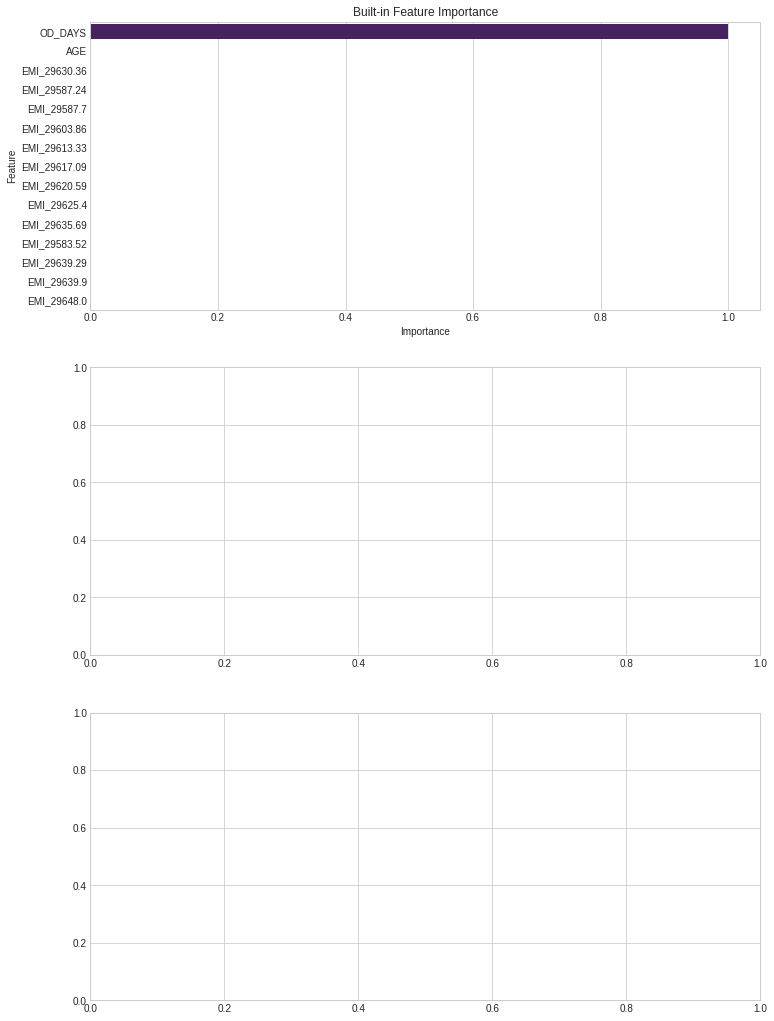

In [67]:
# Get feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']
ohe_features = []
if hasattr(preprocessor.transformers_[1][1][-1], 'get_feature_names_out'):
    ohe_feature_names = preprocessor.transformers_[1][1][-1].get_feature_names_out(categorical_features)
    ohe_features = list(ohe_feature_names)

model_features = numeric_features + ohe_features

# Run the comprehensive feature analysis
feature_analysis = analyze_model_features(best_model, X_train, X_test, y_test, model_features)